## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

* SGD準確度較好，且無Adam之overfitting的狀況

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
# 建立一個有三層隱藏層之神經網路
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()

W0803 14:32:46.371118 40280 deprecation_wrapper.py:119] From E:\Users\moon\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0803 14:32:46.395119 40280 deprecation_wrapper.py:119] From E:\Users\moon\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0803 14:32:46.398119 40280 deprecation_wrapper.py:119] From E:\Users\moon\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



## 1. 將 Epoch 加到 500 個，並觀察 learning curve 的走勢 (模型：Adam)

In [5]:
#Compile 模型
model.summary()

optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

W0803 14:33:14.806744 40280 deprecation_wrapper.py:119] From E:\Users\moon\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0803 14:33:14.814745 40280 deprecation_wrapper.py:119] From E:\Users\moon\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
# 訓練模型並檢視驗證集的結果
#設定要訓練的 Epoch 數至500

model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

W0803 14:34:14.504159 40280 deprecation.py:323] From E:\Users\moon\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0803 14:34:14.559162 40280 deprecation_wrapper.py:119] From E:\Users\moon\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 11s 224us/step - loss: 1.9497 - acc: 0.2967 - val_loss: 1.7975 - val_acc: 0.3479
Epoch 2/500
50000/50000 [==============================] - 11s 211us/step - loss: 1.7087 - acc: 0.3850 - val_loss: 1.6505 - val_acc: 0.4126
Epoch 3/500
50000/50000 [==============================] - 11s 211us/step - loss: 1.6124 - acc: 0.4222 - val_loss: 1.5663 - val_acc: 0.4450
Epoch 4/500
50000/50000 [==============================] - 11s 215us/step - loss: 1.5609 - acc: 0.4417 - val_loss: 1.5535 - val_acc: 0.4494
Epoch 5/500
50000/50000 [==============================] - 11s 215us/step - loss: 1.5042 - acc: 0.4626 - val_loss: 1.4997 - val_acc: 0.4729
Epoch 6/500
50000/50000 [==============================] - 11s 213us/step - loss: 1.4712 - acc: 0.4756 - val_loss: 1.4785 - val_acc: 0.4745
Epoch 7/500
50000/50000 [==============================] - 11s 215us/step - loss: 1.4341 - acc: 0.4908 - val_l

Epoch 59/500
50000/50000 [==============================] - 11s 210us/step - loss: 0.5665 - acc: 0.7982 - val_loss: 1.9261 - val_acc: 0.5113
Epoch 60/500
50000/50000 [==============================] - 10s 207us/step - loss: 0.5576 - acc: 0.7985 - val_loss: 1.9437 - val_acc: 0.5123
Epoch 61/500
50000/50000 [==============================] - 10s 208us/step - loss: 0.5600 - acc: 0.8005 - val_loss: 1.9769 - val_acc: 0.5138
Epoch 62/500
50000/50000 [==============================] - 10s 209us/step - loss: 0.5345 - acc: 0.8094 - val_loss: 2.0394 - val_acc: 0.4995
Epoch 63/500
50000/50000 [==============================] - 10s 208us/step - loss: 0.5217 - acc: 0.8137 - val_loss: 2.0308 - val_acc: 0.5112
Epoch 64/500
50000/50000 [==============================] - 10s 207us/step - loss: 0.5136 - acc: 0.8168 - val_loss: 2.1172 - val_acc: 0.5085
Epoch 65/500
50000/50000 [==============================] - 10s 208us/step - loss: 0.5094 - acc: 0.8187 - val_loss: 2.0277 - val_acc: 0.5160
Epoch 66/500


Epoch 117/500
50000/50000 [==============================] - 10s 206us/step - loss: 0.2846 - acc: 0.8982 - val_loss: 3.3173 - val_acc: 0.4983
Epoch 118/500
50000/50000 [==============================] - 10s 205us/step - loss: 0.2598 - acc: 0.9052 - val_loss: 3.3331 - val_acc: 0.5038
Epoch 119/500
50000/50000 [==============================] - 10s 208us/step - loss: 0.2364 - acc: 0.9144 - val_loss: 3.3655 - val_acc: 0.4943
Epoch 120/500
50000/50000 [==============================] - 10s 206us/step - loss: 0.2609 - acc: 0.9046 - val_loss: 3.3880 - val_acc: 0.4946
Epoch 121/500
50000/50000 [==============================] - 10s 205us/step - loss: 0.2429 - acc: 0.9120 - val_loss: 3.5134 - val_acc: 0.5023
Epoch 122/500
50000/50000 [==============================] - 10s 205us/step - loss: 0.2276 - acc: 0.9187 - val_loss: 3.5358 - val_acc: 0.4971
Epoch 123/500
50000/50000 [==============================] - 11s 212us/step - loss: 0.2414 - acc: 0.9132 - val_loss: 3.4399 - val_acc: 0.4988
Epoch 

Epoch 175/500
50000/50000 [==============================] - 10s 204us/step - loss: 0.1384 - acc: 0.9514 - val_loss: 4.2540 - val_acc: 0.4899
Epoch 176/500
50000/50000 [==============================] - 10s 203us/step - loss: 0.1481 - acc: 0.9471 - val_loss: 4.2626 - val_acc: 0.4821
Epoch 177/500
50000/50000 [==============================] - 10s 203us/step - loss: 0.2363 - acc: 0.9183 - val_loss: 4.1359 - val_acc: 0.4929
Epoch 178/500
50000/50000 [==============================] - 10s 203us/step - loss: 0.1707 - acc: 0.9404 - val_loss: 4.2840 - val_acc: 0.4889
Epoch 179/500
50000/50000 [==============================] - 10s 208us/step - loss: 0.1553 - acc: 0.9446 - val_loss: 4.2942 - val_acc: 0.4853
Epoch 180/500
50000/50000 [==============================] - 10s 206us/step - loss: 0.1956 - acc: 0.9313 - val_loss: 4.2125 - val_acc: 0.4888
Epoch 181/500
50000/50000 [==============================] - 10s 205us/step - loss: 0.2157 - acc: 0.9255 - val_loss: 4.2080 - val_acc: 0.4953
Epoch 

Epoch 233/500
50000/50000 [==============================] - 11s 210us/step - loss: 0.0601 - acc: 0.9805 - val_loss: 4.6206 - val_acc: 0.4944
Epoch 234/500
50000/50000 [==============================] - 11s 213us/step - loss: 0.0983 - acc: 0.9654 - val_loss: 4.5837 - val_acc: 0.4948
Epoch 235/500
50000/50000 [==============================] - 11s 212us/step - loss: 0.1523 - acc: 0.9472 - val_loss: 4.7287 - val_acc: 0.4849
Epoch 236/500
50000/50000 [==============================] - 10s 206us/step - loss: 0.2373 - acc: 0.9234 - val_loss: 4.5683 - val_acc: 0.4915
Epoch 237/500
50000/50000 [==============================] - 10s 205us/step - loss: 0.1656 - acc: 0.9441 - val_loss: 4.5725 - val_acc: 0.4944
Epoch 238/500
50000/50000 [==============================] - 10s 210us/step - loss: 0.1267 - acc: 0.9548 - val_loss: 4.5322 - val_acc: 0.4940
Epoch 239/500
50000/50000 [==============================] - 11s 212us/step - loss: 0.0893 - acc: 0.9686 - val_loss: 4.5376 - val_acc: 0.5034
Epoch 

Epoch 291/500
50000/50000 [==============================] - 11s 212us/step - loss: 0.1011 - acc: 0.9654 - val_loss: 4.8575 - val_acc: 0.4954
Epoch 292/500
50000/50000 [==============================] - 11s 223us/step - loss: 0.1074 - acc: 0.9629 - val_loss: 4.8809 - val_acc: 0.4926
Epoch 293/500
50000/50000 [==============================] - 12s 235us/step - loss: 0.1135 - acc: 0.9609 - val_loss: 4.8684 - val_acc: 0.4909
Epoch 294/500
50000/50000 [==============================] - 11s 214us/step - loss: 0.2045 - acc: 0.9353 - val_loss: 4.8056 - val_acc: 0.4881
Epoch 295/500
50000/50000 [==============================] - 10s 209us/step - loss: 0.1014 - acc: 0.9654 - val_loss: 4.8736 - val_acc: 0.4953
Epoch 296/500
50000/50000 [==============================] - 10s 206us/step - loss: 0.0862 - acc: 0.9700 - val_loss: 4.9569 - val_acc: 0.4919
Epoch 297/500
50000/50000 [==============================] - 10s 205us/step - loss: 0.1765 - acc: 0.9423 - val_loss: 5.0573 - val_acc: 0.4873
Epoch 

50000/50000 [==============================] - 19s 382us/step - loss: 0.0488 - acc: 0.9837 - val_loss: 5.0732 - val_acc: 0.4971
Epoch 349/500
50000/50000 [==============================] - 20s 394us/step - loss: 0.1079 - acc: 0.9633 - val_loss: 5.0474 - val_acc: 0.4897
Epoch 350/500
50000/50000 [==============================] - 19s 375us/step - loss: 0.1871 - acc: 0.9413 - val_loss: 5.0686 - val_acc: 0.4940
Epoch 351/500
50000/50000 [==============================] - 19s 383us/step - loss: 0.1159 - acc: 0.9616 - val_loss: 5.0279 - val_acc: 0.4891
Epoch 352/500
50000/50000 [==============================] - 19s 388us/step - loss: 0.0679 - acc: 0.9768 - val_loss: 5.0803 - val_acc: 0.4927
Epoch 353/500
50000/50000 [==============================] - 19s 386us/step - loss: 0.0948 - acc: 0.9671 - val_loss: 5.0912 - val_acc: 0.4887
Epoch 354/500
50000/50000 [==============================] - 20s 396us/step - loss: 0.1098 - acc: 0.9633 - val_loss: 5.1252 - val_acc: 0.4914
Epoch 355/500
50000/

50000/50000 [==============================] - 18s 369us/step - loss: 0.0764 - acc: 0.9748 - val_loss: 4.9987 - val_acc: 0.4978
Epoch 406/500
50000/50000 [==============================] - 19s 387us/step - loss: 0.0348 - acc: 0.9888 - val_loss: 5.1494 - val_acc: 0.4962
Epoch 407/500
50000/50000 [==============================] - 19s 375us/step - loss: 0.0390 - acc: 0.9873 - val_loss: 5.0811 - val_acc: 0.4942
Epoch 408/500
50000/50000 [==============================] - 19s 372us/step - loss: 0.0274 - acc: 0.9915 - val_loss: 5.1552 - val_acc: 0.4966
Epoch 409/500
50000/50000 [==============================] - 19s 375us/step - loss: 0.0444 - acc: 0.9860 - val_loss: 5.2018 - val_acc: 0.4890
Epoch 410/500
50000/50000 [==============================] - 19s 372us/step - loss: 0.2608 - acc: 0.9264 - val_loss: 5.1490 - val_acc: 0.4834
Epoch 411/500
50000/50000 [==============================] - 19s 380us/step - loss: 0.1603 - acc: 0.9496 - val_loss: 5.0172 - val_acc: 0.4870
Epoch 412/500
50000/

50000/50000 [==============================] - 11s 215us/step - loss: 0.0044 - acc: 0.9995 - val_loss: 5.2458 - val_acc: 0.4982
Epoch 463/500
50000/50000 [==============================] - 11s 213us/step - loss: 0.0035 - acc: 0.9998 - val_loss: 5.2723 - val_acc: 0.5004
Epoch 464/500
50000/50000 [==============================] - 11s 216us/step - loss: 0.0029 - acc: 0.9999 - val_loss: 5.3057 - val_acc: 0.4987
Epoch 465/500
50000/50000 [==============================] - 11s 214us/step - loss: 0.0766 - acc: 0.9815 - val_loss: 5.5732 - val_acc: 0.4651
Epoch 466/500
50000/50000 [==============================] - 11s 215us/step - loss: 0.6063 - acc: 0.8637 - val_loss: 5.0313 - val_acc: 0.4850
Epoch 467/500
50000/50000 [==============================] - 11s 210us/step - loss: 0.1166 - acc: 0.9620 - val_loss: 5.0689 - val_acc: 0.4922
Epoch 468/500
50000/50000 [==============================] - 11s 212us/step - loss: 0.0405 - acc: 0.9869 - val_loss: 5.1508 - val_acc: 0.4978
Epoch 469/500
50000/

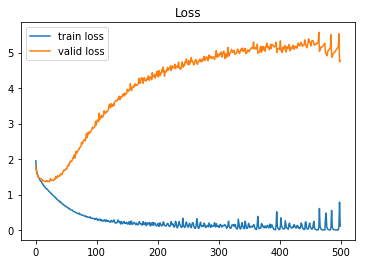

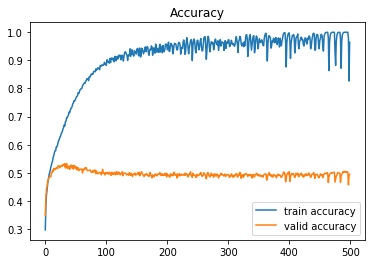

In [8]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

## 2. 將 Optimizer 換成 SGD，並觀察 learning curve 的走勢 (epochs=100)

In [9]:
#Compile 模型
model.summary()

optimizer = keras.optimizers.sgd(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [10]:
# 訓練模型並檢視驗證集的結果
#設定要訓練的 Epoch 數至500

model.fit(x_train, y_train, 
          epochs=100, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 8s 159us/step - loss: 0.0465 - acc: 0.9858 - val_loss: 4.7435 - val_acc: 0.4965
Epoch 2/100
50000/50000 [==============================] - 8s 154us/step - loss: 0.0331 - acc: 0.9916 - val_loss: 4.7380 - val_acc: 0.4976
Epoch 3/100
50000/50000 [==============================] - 8s 156us/step - loss: 0.0273 - acc: 0.9940 - val_loss: 4.7344 - val_acc: 0.4983
Epoch 4/100
50000/50000 [==============================] - 8s 153us/step - loss: 0.0238 - acc: 0.9954 - val_loss: 4.7338 - val_acc: 0.4981
Epoch 5/100
50000/50000 [==============================] - 8s 153us/step - loss: 0.0214 - acc: 0.9963 - val_loss: 4.7343 - val_acc: 0.4986
Epoch 6/100
50000/50000 [==============================] - 8s 154us/step - loss: 0.0196 - acc: 0.9969 - val_loss: 4.7356 - val_acc: 0.4985
Epoch 7/100
50000/50000 [==============================] - 8s 156us/step - loss: 0.0183 - acc: 0.9974 - val_loss: 4.

50000/50000 [==============================] - 8s 160us/step - loss: 0.0082 - acc: 0.9999 - val_loss: 4.8267 - val_acc: 0.5004
Epoch 60/100
50000/50000 [==============================] - 8s 159us/step - loss: 0.0081 - acc: 0.9999 - val_loss: 4.8281 - val_acc: 0.5005
Epoch 61/100
50000/50000 [==============================] - 9s 171us/step - loss: 0.0081 - acc: 0.9998 - val_loss: 4.8294 - val_acc: 0.5008
Epoch 62/100
50000/50000 [==============================] - 8s 154us/step - loss: 0.0080 - acc: 0.9998 - val_loss: 4.8307 - val_acc: 0.5006
Epoch 63/100
50000/50000 [==============================] - 8s 154us/step - loss: 0.0080 - acc: 0.9999 - val_loss: 4.8318 - val_acc: 0.5009
Epoch 64/100
50000/50000 [==============================] - 8s 152us/step - loss: 0.0079 - acc: 0.9999 - val_loss: 4.8332 - val_acc: 0.5009
Epoch 65/100
50000/50000 [==============================] - 8s 157us/step - loss: 0.0079 - acc: 0.9999 - val_loss: 4.8343 - val_acc: 0.5008
Epoch 66/100
50000/50000 [=======

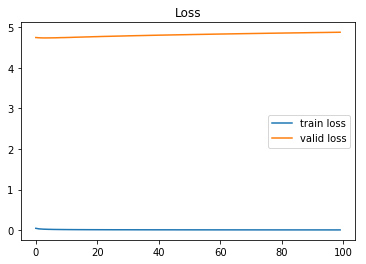

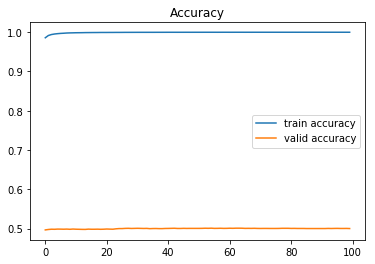

In [11]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()